# Imports

In [9]:
##########
# basics #
##########

import warnings
warnings.filterwarnings('ignore')
import collections
import datetime
import glob
import hashlib
import itertools
import math
import operator
import os
import pickle
import random
import re
import string
import sys
import time

###########
# science #
###########

import scipy as sp
import numpy as np
import pandas as pd
rseed = random.seed(42)
np.random.seed(rseed)

####################
# image processing #
####################

import matplotlib.image as mpimg
import cv2

#################
# visualization #
#################

# plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import cufflinks as cf
tls.set_credentials_file(username=os.environ.get('PLOTLY_USERNAME'), api_key=os.environ.get('PLOTLY_APIKEY'))
cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
mpl.rcParams['figure.figsize']=(12.0,4.0)
%matplotlib inline

############
# sys info #
############

%reload_ext watermark
%watermark -a "Ken Cavagnolo" -n -u -v -m -h -g -p numpy,scipy,pandas,matplotlib,plotly

Ken Cavagnolo 
last updated: Sun Oct 30 2016 

CPython 2.7.10
IPython 4.1.1

numpy 1.11.2
scipy 0.18.1
pandas 0.19.0
matplotlib 1.5.3
plotly 1.12.9

compiler   : GCC 4.2.1 Compatible Apple LLVM 7.0.0 (clang-700.0.72)
system     : Darwin
release    : 15.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
host name  : DrGonzo.local
Git hash   : 


# Load Image

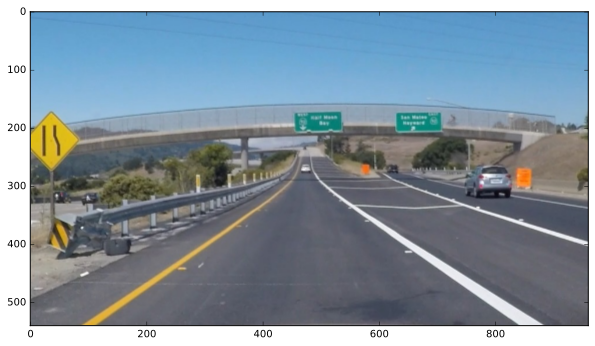

In [73]:
image = (mpimg.imread('exit-ramp.png')*255).astype('uint8')
plt.figure(figsize=(10,10))
plt.imshow(image)

# Gray Scale

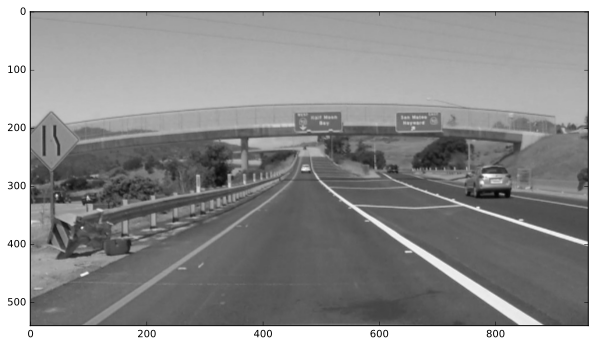

In [74]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #grayscale conversion
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')

# Smooth

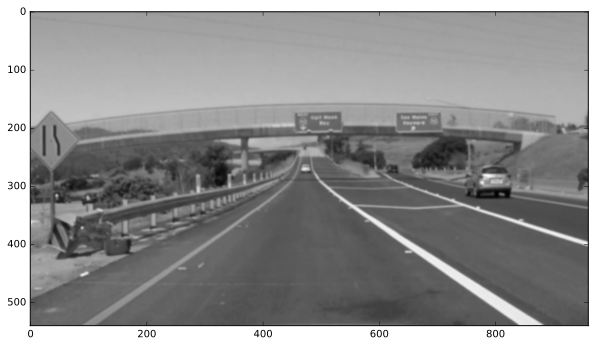

In [75]:
# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)
plt.figure(figsize=(10,10))
plt.imshow(blur_gray, cmap='gray')

# Canny Edge Detection

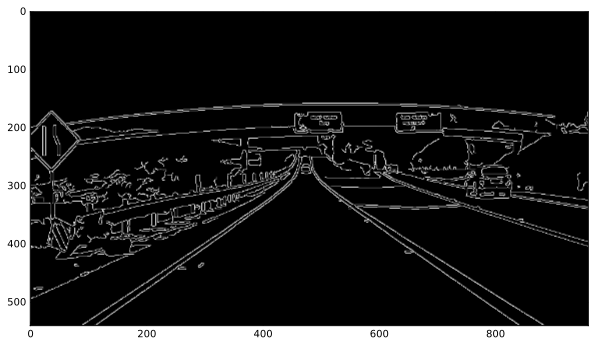

In [76]:
# Define parameters for Canny and run it
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='Greys_r')

# Mask Image

In [85]:
image.shape

(540, 960, 3)

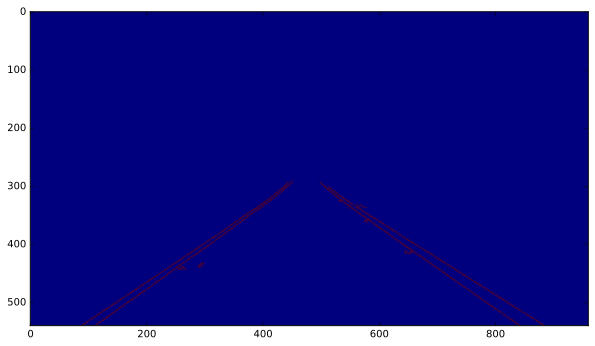

In [112]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0, imshape[0]),
                      (450, 290), 
                      (490, 290), 
                      (imshape[1], imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(masked_edges)

# Hough Transform

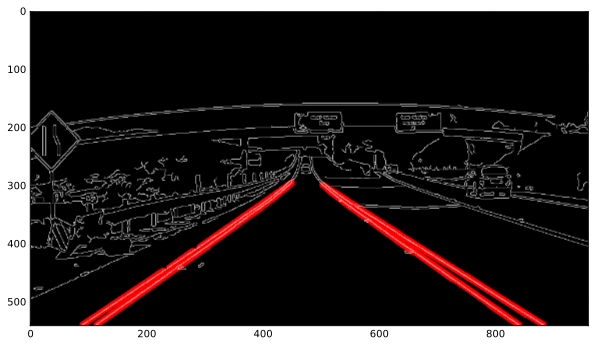

In [113]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2
theta = 1*np.pi/180
threshold = 15
min_line_length = 40
max_line_gap = 20
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.figure(figsize=(10,10))
plt.imshow(lines_edges)